# Ant Colony Optimization (ACO) for the Bin Packing Problem (BPP)

## Introduction

The script evaluates ACO performance across various configurations and metrics, including solution quality, convergence behavior, and computational efficiency.

---

## Features
- **Customizable Inputs**: Parameters such as the number of ants, bins, items, and evaporation rate can be configured.
- **Dynamic Fitness Evaluation**: The algorithm dynamically evaluates the best, worst, and average fitness values for each iteration.
- **Early Stopping Criteria**: The algorithm stops early if convergence is detected or all fitness values reach 0.
- **Performance Metrics**: Runtime, iteration times, and fitness over iterations are recorded and analyzed.
- **Complexity Analysis**: Time and space complexity are calculated and displayed.

---

## Code Functionality
1. **Validation**:
   - Input parameters such as number of ants, bins, evaporation rate are validated to ensure proper execution. 
   
2. **Initialization**:
   - Pheromone matrix is initialized randomly.
   - Item weights are assigned based on the chosen weight distribution type.

3. **Main ACO Process**:
   - **Path Generation**: Ants probabilistically assign items to bins based on pheromone levels.
   - **Fitness Evaluation**: Calculates the difference between the heaviest and lightest bins.
   - **Pheromone Updates**: Adjusts pheromone levels to reinforce better solutions.
   - **Early Stopping**: Terminates if fitness values converge or meet predefined criteria.

4. **Performance Metrics**:
   - Outputs runtime statistics and plots fitness over iterations.

5. **Complexity Analysis**:
   - Time and space complexity are analyzed based on the input parameters and algorithmic operations.

---

## To run the algoirthm:
   - **Option 1:** Smiply Press Run All and your will run every experment
   - **Option 2:**  Run the cell simply titled "CODE", then can either run pre-existing experment by running individual cells or set your own up 

---

## Required Libraries
To run this code, the following Python libraries are required:
- `numpy`: For matrix and numerical computations.
- `matplotlib`: For plotting fitness trends.
- `random`: For generating random weights and paths.

You can install these libraries using:
```bash
pip install numpy matplotlib


In [ ]:
"""CODE"""

import numpy as np
import random
from numpy.random import choice
import matplotlib.pyplot as plt
import time

# Validate inputs
def validate_inputs(ants_set, evaporation_set, BPP_weight_set, num_items, bins_set, iterations):
    if not isinstance(ants_set, int) or ants_set <= 0:
        raise ValueError("Number of ants (ants_set) must be a positive integer.")
    if not (0 < evaporation_set <= 1):
        raise ValueError("Evaporation rate (evaporation_set) must be a float between 0 and 1.")
    if not isinstance(BPP_weight_set, int) or BPP_weight_set not in [1, 2, 3, 4, 5]:
        raise ValueError("BPP_weight_set must be an integer between 1 and 5.")
    if not isinstance(num_items, int) or num_items <= 0:
        raise ValueError("Number of items (num_items) must be a positive integer.")
    if not isinstance(bins_set, int) or bins_set <= 0:
        raise ValueError("Number of bins (bins_set) must be a positive integer.")
    if not isinstance(iterations, int) or iterations <= 0:
        raise ValueError("Number of iterations must be a positive integer.")
    
# Initialize pheromones for items and bins
def initialise_and_distribute_pheromones_matrix(items, bins):
    random_matrix = np.random.rand(items, bins)
    return random_matrix

# Generate paths for all ants
def Generate_ant_path_probabilities(random_matrix, ants):     
    denom = np.sum(random_matrix, axis=1, keepdims=True)
    biased_matrix = random_matrix / denom  # Normalize each row

    all_paths = []
    for ant in range(ants):
        path = []
        for item_index in range(random_matrix.shape[0]):  # Iterate over items
            probabilities = biased_matrix[item_index]  # Probabilities for the current item across bins
            selected_bin = choice([bin_idx for bin_idx in range(random_matrix.shape[1])], p=probabilities) + 1
            path.append(selected_bin)  # Bins are 1-indexed (bin 1, bin 2, etc.)
        
        all_paths.append(path)
    return all_paths

# Calculate fitness for all paths
def CalculateFitness(paths_set, items_set, bins_set, ants_set, BPP_weight_set):
    diff = [0 for ant in range(ants_set)]  # Difference between heaviest and lightest bins
    for ant in range(ants_set):
        bin_weights = [0 for bin_idx in range(bins_set)]
        for item in range(items_set):
            bin_weights[paths_set[ant][item] - 1] += BPP_weight_set[paths_set[ant][item] - 1]
        diff[ant] = max(bin_weights) - min(bin_weights)
    return diff

def SummarizeResults(diff, paths_set):
    results = [min(diff), paths_set[diff.index(min(diff))], max(diff), paths_set[diff.index(max(diff))], sum(diff) / len(diff)]
    return results

# Display summarized results
def DisplayResults(diff, paths_set):
    results = SummarizeResults(diff, paths_set)
    print("Fitness:    Best: ", results[0], "  Worst: ", results[2], "  Average: ", results[4])
    print("    Best path: ", results[1])
    print("    Worst path: ", results[3])
   

# Main ACO function
def AntColonyOptimization(ants_set, evaporation_set, BPP_weight_set, num_items, bins_set, iterations):
    validate_inputs(ants_set, evaporation_set, BPP_weight_set, num_items, bins_set, iterations)

    print("TEST INPUTS:")
    print("Number of ants:", ants_set)
    print("Number of items:", num_items)
    print("Number of bins:", bins_set)
    print("Evaporation rate:", evaporation_set)
    print("Iterations:", iterations)

    # Assign weights
    if BPP_weight_set == 1:
        item_weights = [item + 1 for item in range(num_items)]
        print("Weight selected: incrementally increasing weights distribution\n")
    elif BPP_weight_set == 2:
        item_weights = [10 for _ in range(num_items)]
        print("Weight selected: uniform weight distribution\n")
    elif BPP_weight_set == 3:
        item_weights = [random.randint(1, 100) for _ in range(num_items)]
        print("Weight selected: random weight distribution\n")
    elif BPP_weight_set == 4:
        item_weights = [random.randint(1, 100) for _ in range(num_items)]
        print("Weight selected: exponential weights distribution\n")
    elif BPP_weight_set == 5:
        item_weights = [((item + 1) * (item + 1)) / 2 for item in range(num_items)]
        print("Weight selected: incrementally exponential distribution selected\n")

    random_matrix = initialise_and_distribute_pheromones_matrix(num_items, bins_set)
    fitness_over_time = []
    consecutive_count = 0
    last_fitness = None

    total_start_time = time.time()
    iteration_times = []

    for itr in range(iterations):
        iteration_start_time = time.time()

        all_paths = Generate_ant_path_probabilities(random_matrix, ants_set)
        diff = CalculateFitness(all_paths, num_items, bins_set, ants_set, item_weights)

        # Handle division by zero for delta_pheromone
        if min(diff) == 0:
            delta_pheromone = 100  # Assign a constant value when the fitness difference is zero
        else:
            delta_pheromone = 100 / min(diff)  # Normal calculation otherwise

        # Update pheromone matrix
        for item in range(num_items):
            random_matrix[item][all_paths[diff.index(min(diff))][item] - 1] += delta_pheromone

        random_matrix = np.array([[evaporation_set * random_matrix[item][bin_idx] for bin_idx in range(bins_set)] for item in range(num_items)])

        current_fitness = min(diff)
        fitness_over_time.append(current_fitness)

        # Print first generation
        if itr == 0:
            print("First Generation: ")
            DisplayResults(diff, all_paths)

        # Check new termination criteria: all fitness values are 0
        if min(diff) == 0 and max(diff) == 0 and sum(diff) / len(diff) == 0:
            print(f"\nStopping early: All fitness values reached 0 at iteration {itr + 1}")
            print("\nLast Generation: ")
            DisplayResults(diff, all_paths)
            break

        if current_fitness == last_fitness:
            consecutive_count += 1
            if consecutive_count >= 50:
                print(f"\nStopping early: Convergence detected after {itr + 1} iterations")
                print("\nLast Generation: ")
                DisplayResults(diff, all_paths)
                break
        else:
            consecutive_count = 0
        last_fitness = current_fitness

        iteration_end_time = time.time()
        iteration_times.append(iteration_end_time - iteration_start_time)

    # Display results if no early stopping
    if itr == iterations - 1:
        print("\nall itertaion have been used")
        print("\nLast Generation: ")
        DisplayResults(diff, all_paths)


    total_end_time = time.time()
    print("\nPerformance Summary:")
    print(f"Total runtime: {total_end_time - total_start_time:.2f} seconds")


    if len(iteration_times) > 0:
        print(f"Average iteration runtime: {sum(iteration_times) / len(iteration_times):.2f} seconds")
        print(f"Fastest iteration runtime: {min(iteration_times):.2f} seconds")
        print(f"Slowest iteration runtime: {max(iteration_times):.2f} seconds")
    else:
        print("No iterations were performed, so runtime statistics are unavailable.")



    # Plot the fitness over time
    plt.plot(fitness_over_time)
    plt.title("Fitness Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness")
    plt.show()

    # Analyze time complexity
    path_gen_complexity = ants_set * num_items * bins_set
    fitness_calc_complexity = ants_set * num_items
    pheromone_update_complexity = num_items * bins_set
    iteration_complexity = path_gen_complexity + fitness_calc_complexity + pheromone_update_complexity
    total_complexity = iteration_complexity * iterations
    print("Time Complexity Analysis:")
    print(f"Path generation complexity (per iteration): O({path_gen_complexity})")
    print(f"Fitness calculation complexity (per iteration): O({fitness_calc_complexity})")
    print(f"Pheromone update complexity (per iteration): O({pheromone_update_complexity})")
    print(f"Total complexity (all iterations): O({total_complexity})")


    # Analyze space complexity
    pheromone_matrix_space = num_items * bins_set  # Space for pheromone matrix
    paths_space = ants_set * num_items  # Space for all_paths
    fitness_space = ants_set  # Space for fitness array
    weights_space = num_items  # Space for item_weights
    total_space = pheromone_matrix_space + paths_space + fitness_space + weights_space
    print("\nSpace Complexity Analysis:")
    print(f"Pheromone matrix space: O({pheromone_matrix_space})")
    print(f"Paths space: O({paths_space})")
    print(f"Fitness array space: O({fitness_space})")
    print(f"Weights space: O({weights_space})")
    print(f"Total space complexity: O({total_space})")

## Running Experiments
Below are pre-configured experiments that can be run to test the ACO algorithm under different conditions. Each experiment highlights a specific aspect of the algorithm’s performance.

### **How to Run an Experiment**
Simply run each cell seperatly or run them all at once

### **Warning**
Some experiments involve a large number of items, bins, or iterations, which may result in **long runtimes**. On a MacBook M1 with 8GB of memory, runtimes for pre-configured tests were observed as follows:

The first three were the one that can be found in the report

- **Test 1**: >1 sec - in presenation 
- **Test 2**: ~5.6 sec - in presenation
- **Test 3**: ~44 min - in presenation
- **Test 4**: ~30 sec 
- **Test 5**: ~11 sec
- **Test 6**: ~2 min

Plan accordingly before running tests with high computational loads.





Running Test 1: Uniform Weight Distribution
TEST INPUTS:
Number of ants: 10
Number of items: 100
Number of bins: 10
Evaporation rate: 0.8
Iterations: 1000
Weight selected: uniform weight distribution

First Generation: 
Fitness:    Best:  60   Worst:  140   Average:  99.0
    Best path:  [7, 2, 4, 10, 3, 1, 5, 7, 9, 2, 1, 1, 8, 5, 5, 8, 3, 4, 5, 2, 3, 8, 2, 9, 4, 3, 7, 1, 6, 4, 2, 4, 7, 7, 1, 2, 6, 10, 8, 3, 8, 6, 3, 2, 1, 9, 9, 7, 7, 10, 6, 2, 5, 8, 9, 9, 2, 5, 6, 9, 2, 8, 2, 4, 8, 5, 10, 4, 10, 5, 2, 5, 10, 9, 1, 10, 9, 1, 5, 6, 1, 6, 5, 2, 3, 1, 3, 6, 5, 10, 5, 9, 4, 1, 8, 3, 10, 7, 1, 5]
    Worst path:  [8, 2, 8, 8, 5, 4, 3, 8, 2, 5, 9, 4, 10, 4, 6, 4, 7, 6, 1, 9, 1, 6, 10, 2, 8, 9, 3, 8, 10, 1, 1, 5, 7, 1, 8, 8, 2, 4, 8, 6, 6, 2, 9, 2, 9, 7, 6, 7, 8, 1, 9, 7, 5, 7, 8, 2, 8, 5, 6, 1, 8, 3, 7, 1, 2, 8, 5, 5, 7, 4, 1, 3, 9, 10, 6, 9, 2, 8, 6, 8, 8, 7, 5, 7, 1, 9, 8, 2, 4, 6, 9, 10, 1, 5, 4, 5, 9, 10, 10, 10]

Stopping early: All fitness values reached 0 at iteration 55

Last Generat

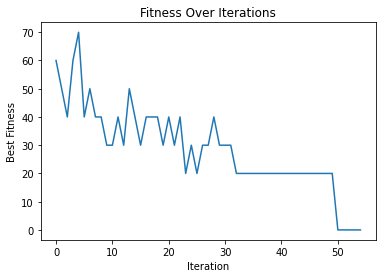

Time Complexity Analysis:
Path generation complexity (per iteration): O(10000)
Fitness calculation complexity (per iteration): O(1000)
Pheromone update complexity (per iteration): O(1000)
Total complexity (all iterations): O(12000000)

Space Complexity Analysis:
Pheromone matrix space: O(1000)
Paths space: O(1000)
Fitness array space: O(10)
Weights space: O(100)
Total space complexity: O(2110)


"Expected Results:\nThe best fitness should improve steadily across iterations, with the difference between the heaviest and lightest bins reducing over time.\nConvergence may take longer due to uniformity, as there are no significant biases in weight distribution.\nWhy This Test: This tests the algorithm's ability to evenly distribute identical weights across bins, demonstrating robustness in simple scenarios."

In [ ]:
# Test 1: Uniform Weight Distribution
print("Running Test 1: Uniform Weight Distribution")
AntColonyOptimization(
    ants_set=10,
    evaporation_set=0.8,
    BPP_weight_set=2,  # Uniform weight distribution
    num_items=100,
    bins_set=10,
    iterations=1000
)

Running Test 2: Skewed Weight Distribution
TEST INPUTS:
Number of ants: 20
Number of items: 200
Number of bins: 10
Evaporation rate: 0.8
Iterations: 1000
Weight selected: exponential weights distribution

First Generation: 
Fitness:    Best:  1577   Worst:  2646   Average:  2180.7
    Best path:  [9, 4, 4, 10, 10, 6, 5, 6, 5, 8, 6, 7, 3, 4, 8, 9, 8, 6, 6, 4, 10, 5, 1, 1, 4, 6, 8, 10, 8, 4, 7, 2, 5, 4, 6, 1, 4, 2, 2, 6, 7, 6, 1, 6, 3, 1, 10, 9, 4, 8, 2, 2, 3, 4, 5, 4, 3, 6, 3, 7, 3, 5, 9, 5, 1, 2, 9, 10, 3, 1, 1, 7, 2, 8, 7, 3, 2, 3, 7, 3, 1, 10, 1, 1, 2, 1, 5, 5, 6, 4, 4, 7, 1, 9, 4, 3, 7, 9, 9, 4, 3, 2, 6, 5, 2, 2, 1, 9, 9, 2, 7, 4, 5, 7, 3, 2, 3, 4, 5, 1, 4, 6, 10, 10, 3, 4, 1, 9, 10, 6, 1, 8, 2, 9, 7, 4, 3, 2, 8, 6, 10, 7, 1, 4, 2, 6, 9, 4, 10, 10, 3, 9, 2, 8, 1, 5, 1, 9, 8, 1, 7, 7, 3, 1, 7, 7, 2, 8, 7, 5, 1, 5, 5, 7, 3, 2, 8, 9, 2, 10, 8, 10, 8, 5, 8, 9, 9, 4, 4, 5, 8, 10, 10, 9, 2, 3, 1, 3, 5, 4]
    Worst path:  [8, 4, 7, 3, 8, 3, 3, 5, 9, 6, 1, 5, 9, 8, 8, 4, 8, 1, 7, 7, 4, 10,

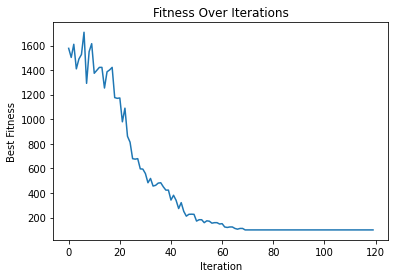

Time Complexity Analysis:
Path generation complexity (per iteration): O(40000)
Fitness calculation complexity (per iteration): O(4000)
Pheromone update complexity (per iteration): O(2000)
Total complexity (all iterations): O(46000000)

Space Complexity Analysis:
Pheromone matrix space: O(2000)
Paths space: O(4000)
Fitness array space: O(20)
Weights space: O(200)
Total space complexity: O(6220)


' \nExpected Results:\nThe best fitness should stabilize quickly, as larger weights create a stronger bias in pheromone updates.\nFaster convergence compared to Test 1 due to more apparent optimization paths.\nWhy This Test: This examines how the algorithm handles complex weight distributions and adapts the pheromone matrix to optimize resource allocation.\n'

In [ ]:
# Test 2: Skewed Weight Distribution
print("Running Test 2: Skewed Weight Distribution")
AntColonyOptimization(
    ants_set=20,
    evaporation_set=0.8,
    BPP_weight_set=4,  # Exponential weights
    num_items=200,
    bins_set=10,
    iterations=1000
)


TEST INPUTS:
Number of ants: 500
Number of items: 1000
Number of bins: 50
Evaporation rate: 0.9
Iterations: 1000
Weight selected: incrementally increasing weights distribution

First Generation: 
Fitness:    Best:  967   Worst:  1777   Average:  1239.084
    Best path:  [37, 21, 31, 30, 8, 32, 31, 31, 16, 37, 5, 32, 42, 7, 15, 3, 24, 39, 39, 45, 43, 10, 2, 5, 50, 10, 36, 44, 4, 7, 46, 24, 46, 2, 6, 22, 28, 32, 26, 14, 11, 17, 33, 20, 21, 3, 25, 8, 28, 40, 31, 28, 6, 18, 32, 41, 14, 29, 48, 24, 25, 47, 39, 11, 31, 11, 19, 43, 48, 18, 29, 50, 12, 47, 11, 6, 8, 4, 22, 23, 42, 32, 16, 44, 32, 6, 41, 7, 14, 18, 22, 5, 20, 26, 16, 11, 5, 23, 9, 11, 6, 49, 15, 28, 39, 45, 34, 13, 31, 11, 38, 18, 13, 37, 25, 2, 12, 17, 44, 15, 2, 11, 41, 22, 28, 1, 33, 44, 21, 31, 6, 10, 29, 12, 48, 1, 20, 2, 23, 27, 31, 17, 39, 46, 4, 7, 28, 22, 26, 13, 37, 32, 41, 10, 19, 36, 19, 35, 17, 7, 6, 15, 45, 35, 31, 23, 39, 13, 45, 22, 16, 47, 31, 12, 8, 20, 45, 43, 1, 14, 32, 24, 46, 18, 23, 45, 13, 21, 27, 49, 39

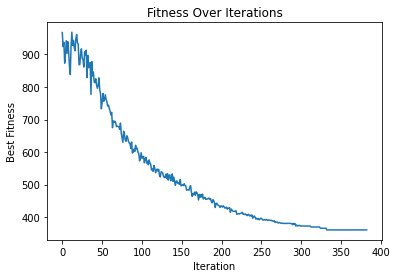

Time Complexity Analysis:
Path generation complexity (per iteration): O(25000000)
Fitness calculation complexity (per iteration): O(500000)
Pheromone update complexity (per iteration): O(50000)
Total complexity (all iterations): O(25550000000)

Space Complexity Analysis:
Pheromone matrix space: O(50000)
Paths space: O(500000)
Fitness array space: O(500)
Weights space: O(1000)
Total space complexity: O(551500)


In [ ]:
# test3 : stress test on the algoirthsm random weight distribution 
print("Running Test 3: random weight Distribution")
AntColonyOptimization(500, 0.9, 1, 1000, 50, 1000)


Running Test 3: High Number of Bins and Items
TEST INPUTS:
Number of ants: 50
Number of items: 500
Number of bins: 50
Evaporation rate: 0.6
Iterations: 100
Weight selected: incrementally increasing weights distribution

First Generation: 
Fitness:    Best:  523   Worst:  950   Average:  685.86
    Best path:  [40, 18, 12, 32, 30, 32, 41, 29, 40, 31, 12, 45, 25, 40, 15, 13, 21, 5, 38, 16, 11, 26, 1, 40, 27, 15, 8, 30, 14, 31, 18, 22, 41, 3, 46, 49, 2, 46, 1, 7, 25, 1, 31, 22, 32, 8, 16, 24, 15, 34, 10, 2, 1, 20, 42, 44, 5, 42, 25, 35, 6, 27, 19, 30, 24, 16, 18, 13, 16, 46, 32, 4, 9, 26, 8, 29, 20, 35, 49, 25, 10, 27, 42, 49, 17, 41, 5, 45, 32, 28, 11, 49, 10, 19, 16, 43, 10, 41, 10, 38, 26, 1, 5, 47, 42, 10, 40, 4, 37, 30, 39, 32, 15, 44, 42, 25, 16, 2, 13, 3, 19, 6, 3, 42, 15, 37, 18, 19, 32, 5, 44, 11, 38, 27, 18, 44, 45, 40, 4, 4, 31, 13, 27, 46, 34, 11, 47, 26, 32, 26, 1, 7, 38, 10, 39, 49, 1, 48, 40, 35, 17, 16, 49, 12, 44, 20, 26, 24, 5, 2, 19, 30, 22, 1, 45, 8, 32, 32, 15, 47, 20

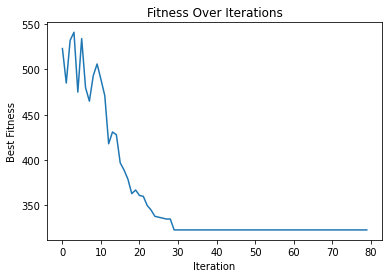

Time Complexity Analysis:
Path generation complexity (per iteration): O(1250000)
Fitness calculation complexity (per iteration): O(25000)
Pheromone update complexity (per iteration): O(25000)
Total complexity (all iterations): O(130000000)

Space Complexity Analysis:
Pheromone matrix space: O(25000)
Paths space: O(25000)
Fitness array space: O(50)
Weights space: O(500)
Total space complexity: O(50550)


' \nExpected Results:\nThe algorithm should still converge but may take longer due to the larger problem size.\nTime and space complexity should increase significantly, but the algorithm should remain computationally feasible.\nWhy This Test: To assess scalability and ensure the implementation works efficiently for larger datasets.\n'

In [ ]:
# Test 4: High Number of Bins and Items
print("Running Test 4: High Number of Bins and Items")
AntColonyOptimization(
    ants_set=50,
    evaporation_set=0.6,
    BPP_weight_set=1,  # Incrementally increasing weights
    num_items=500,
    bins_set=50,
    iterations=1000
)


Running Real-Life Scenario: Cloud Server Resource Allocation
TEST INPUTS:
Number of ants: 20
Number of items: 200
Number of bins: 10
Evaporation rate: 0.9
Iterations: 1000
Weight selected: random weight distribution

First Generation: 
Fitness:    Best:  1216   Worst:  2297   Average:  1742.7
    Best path:  [8, 7, 6, 2, 8, 7, 7, 5, 3, 3, 2, 5, 8, 6, 3, 6, 1, 7, 7, 8, 4, 10, 1, 7, 5, 3, 5, 10, 8, 2, 10, 4, 4, 2, 1, 4, 6, 3, 1, 4, 8, 8, 10, 7, 10, 9, 4, 7, 2, 6, 6, 7, 4, 5, 5, 5, 6, 4, 10, 6, 2, 6, 9, 2, 10, 2, 7, 2, 1, 1, 1, 1, 1, 4, 6, 7, 10, 3, 8, 5, 9, 10, 9, 1, 10, 6, 5, 8, 6, 10, 2, 7, 1, 8, 3, 6, 2, 8, 5, 6, 2, 10, 5, 1, 5, 7, 6, 7, 4, 4, 6, 5, 10, 7, 2, 8, 10, 7, 2, 4, 8, 4, 1, 3, 1, 7, 2, 2, 4, 3, 4, 7, 10, 3, 2, 1, 4, 2, 7, 9, 9, 6, 3, 3, 3, 7, 3, 4, 8, 5, 6, 6, 9, 7, 2, 8, 6, 2, 2, 2, 4, 8, 3, 1, 1, 2, 10, 2, 10, 6, 8, 8, 6, 2, 3, 9, 5, 4, 1, 1, 3, 8, 1, 5, 4, 5, 10, 4, 10, 10, 10, 10, 10, 4, 8, 2, 4, 5, 7, 1]
    Worst path:  [3, 3, 5, 9, 5, 10, 9, 8, 2, 3, 1, 5, 6, 10, 9, 6

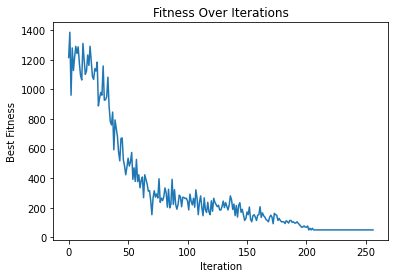

Time Complexity Analysis:
Path generation complexity (per iteration): O(40000)
Fitness calculation complexity (per iteration): O(4000)
Pheromone update complexity (per iteration): O(2000)
Total complexity (all iterations): O(46000000)

Space Complexity Analysis:
Pheromone matrix space: O(2000)
Paths space: O(4000)
Fitness array space: O(20)
Weights space: O(200)
Total space complexity: O(6220)


' \nExpected Results:\nThe algorithm should still converge but may take longer due to the larger problem size.\nTime and space complexity should increase significantly, but the algorithm should remain computationally feasible.\nWhy This Test: To assess scalability and ensure the implementation works efficiently for larger datasets.\n'

In [ ]:
# test 5 Real-Life Scenario: Cloud Server Resource Allocation
print("Running Real-Life Scenario: Cloud Server Resource Allocation")
AntColonyOptimization(
    ants_set=20,
    evaporation_set=0.9,
    BPP_weight_set=3,  # Random weights representing VM resource demands
    num_items=200,  # Number of VMs
    bins_set=10,    # Number of servers
    iterations=1000
)

''' 
Expected Results:
The algorithm should still converge but may take longer due to the larger problem size.
Time and space complexity should increase significantly, but the algorithm should remain computationally feasible.
Why This Test: To assess scalability and ensure the implementation works efficiently for larger datasets.
'''

TEST INPUTS:
Number of ants: 100
Number of items: 500
Number of bins: 10
Evaporation rate: 0.9
Iterations: 1000
Weight selected: incrementally increasing weights distribution

First Generation: 
Fitness:    Best:  398   Worst:  647   Average:  490.07
    Best path:  [6, 3, 6, 5, 10, 3, 5, 10, 5, 2, 8, 5, 1, 2, 2, 5, 1, 7, 3, 10, 5, 8, 1, 1, 2, 6, 4, 8, 1, 9, 9, 3, 9, 1, 10, 7, 4, 5, 2, 4, 8, 3, 5, 2, 1, 8, 3, 3, 7, 9, 4, 9, 7, 7, 9, 1, 2, 10, 10, 6, 1, 4, 3, 8, 8, 8, 7, 6, 7, 9, 2, 7, 10, 1, 3, 7, 4, 9, 1, 1, 8, 9, 6, 10, 1, 8, 2, 5, 8, 8, 9, 4, 7, 10, 4, 8, 5, 2, 5, 1, 7, 3, 7, 6, 7, 6, 3, 8, 6, 5, 10, 7, 8, 2, 6, 6, 3, 9, 2, 5, 2, 9, 4, 1, 4, 9, 8, 5, 7, 3, 5, 4, 1, 4, 10, 3, 6, 7, 3, 9, 10, 2, 7, 5, 8, 5, 2, 3, 2, 6, 2, 1, 1, 4, 10, 9, 5, 6, 9, 6, 3, 4, 4, 4, 9, 5, 6, 10, 1, 3, 3, 3, 7, 4, 4, 9, 6, 9, 8, 5, 9, 6, 6, 2, 4, 10, 3, 6, 3, 9, 10, 2, 10, 3, 1, 6, 9, 7, 1, 1, 8, 2, 7, 10, 7, 2, 5, 5, 4, 8, 7, 10, 10, 1, 5, 10, 2, 6, 9, 8, 6, 3, 7, 4, 2, 9, 4, 3, 5, 8, 2, 8, 8, 4, 3, 7, 10,

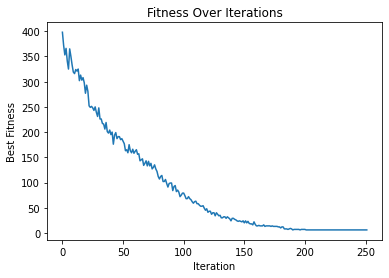

Time Complexity Analysis:
Path generation complexity (per iteration): O(500000)
Fitness calculation complexity (per iteration): O(50000)
Pheromone update complexity (per iteration): O(5000)
Total complexity (all iterations): O(555000000)

Space Complexity Analysis:
Pheromone matrix space: O(5000)
Paths space: O(50000)
Fitness array space: O(100)
Weights space: O(500)
Total space complexity: O(55600)


In [ ]:
#test 6
print("Running Test 6:")

AntColonyOptimization(100, 0.9, 1, 500, 10, 1000)

## Running Unit Test
Below are pre-configured Unit test that was used to test the ACO algorithm under different conditions. 

### **How to Run an Experiment**
Simply run each cell seperatly or run them all at once

### **Results of unit test**
the unit test uncovred a divisibility (diving by 0) issue in ealrier predecesor of this algoirthm that has now been fixed

TEST INPUTS:
Number of ants: 10
Number of items: 1000
Number of bins: 10
Evaporation rate: 0.9
Iterations: 10
Weight selected: random weight distribution

First Generation: 
Fitness:    Best:  6783   Worst:  9373   Average:  8317.9
    Best path:  [1, 7, 10, 5, 4, 3, 2, 6, 4, 4, 8, 7, 6, 10, 6, 1, 1, 6, 3, 9, 5, 3, 4, 10, 6, 6, 4, 3, 2, 4, 8, 7, 4, 4, 6, 7, 10, 5, 2, 8, 9, 6, 2, 3, 7, 4, 1, 5, 10, 8, 2, 3, 5, 10, 3, 2, 5, 7, 8, 8, 5, 10, 4, 3, 7, 6, 3, 2, 7, 10, 1, 4, 9, 9, 4, 2, 4, 10, 10, 7, 3, 4, 10, 6, 1, 1, 6, 2, 6, 8, 1, 3, 1, 2, 10, 7, 9, 7, 6, 4, 10, 10, 5, 1, 5, 3, 10, 10, 8, 7, 2, 3, 1, 7, 6, 9, 5, 5, 4, 7, 6, 9, 5, 8, 1, 5, 10, 9, 9, 4, 7, 3, 6, 6, 4, 2, 3, 10, 4, 5, 5, 5, 1, 2, 4, 5, 1, 9, 2, 2, 5, 2, 6, 5, 7, 6, 2, 3, 3, 1, 1, 6, 9, 4, 9, 3, 7, 1, 8, 1, 9, 6, 4, 1, 9, 3, 4, 9, 6, 8, 6, 1, 6, 9, 10, 4, 7, 9, 7, 5, 9, 9, 7, 2, 3, 8, 5, 7, 3, 6, 8, 9, 7, 9, 3, 1, 1, 1, 5, 8, 1, 6, 6, 6, 9, 2, 6, 10, 8, 3, 1, 5, 7, 6, 9, 9, 1, 5, 9, 8, 6, 2, 3, 9, 10, 1, 4, 2, 3, 9, 2, 2, 10, 

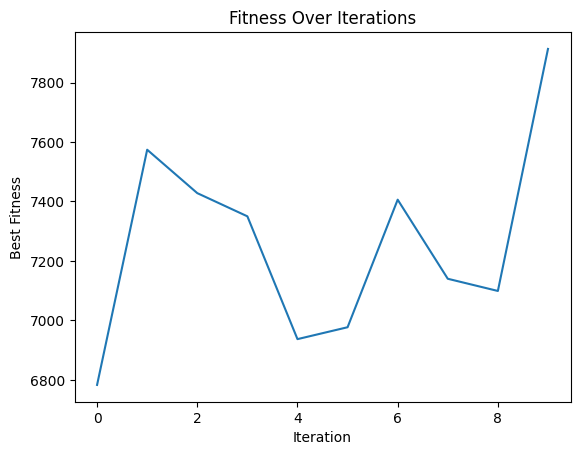

.

Time Complexity Analysis:
Path generation complexity (per iteration): O(100000)
Fitness calculation complexity (per iteration): O(10000)
Pheromone update complexity (per iteration): O(10000)
Total complexity (all iterations): O(1200000)

Space Complexity Analysis:
Pheromone matrix space: O(10000)
Paths space: O(10000)
Fitness array space: O(10)
Weights space: O(1000)
Total space complexity: O(21010)
TEST INPUTS:
Number of ants: 5
Number of items: 50
Number of bins: 5
Evaporation rate: 0.8
Iterations: 20
Weight selected: incrementally exponential distribution selected

First Generation: 
Fitness:    Best:  94.5   Worst:  157.5   Average:  121.7
    Best path:  [2, 1, 4, 5, 1, 5, 1, 4, 2, 3, 2, 1, 1, 1, 1, 2, 4, 2, 1, 2, 2, 2, 3, 5, 1, 4, 4, 4, 2, 5, 2, 4, 1, 4, 5, 3, 5, 4, 3, 1, 3, 5, 3, 5, 2, 3, 2, 2, 3, 2]
    Worst path:  [3, 5, 4, 3, 2, 1, 5, 2, 3, 3, 1, 3, 1, 5, 4, 1, 5, 4, 2, 1, 1, 3, 3, 5, 1, 1, 2, 4, 2, 5, 5, 3, 2, 4, 5, 5, 1, 5, 1, 2, 5, 5, 2, 2, 2, 4, 3, 5, 2, 4]

all itertaio

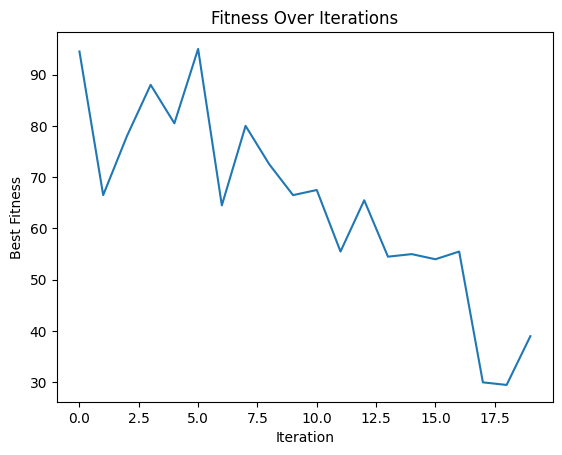

.

Time Complexity Analysis:
Path generation complexity (per iteration): O(1250)
Fitness calculation complexity (per iteration): O(250)
Pheromone update complexity (per iteration): O(250)
Total complexity (all iterations): O(35000)

Space Complexity Analysis:
Pheromone matrix space: O(250)
Paths space: O(250)
Fitness array space: O(5)
Weights space: O(50)
Total space complexity: O(555)
TEST INPUTS:
Number of ants: 10
Number of items: 50
Number of bins: 10
Evaporation rate: 0.9
Iterations: 10
Weight selected: random weight distribution

First Generation: 
Fitness:    Best:  304   Worst:  946   Average:  537.5
    Best path:  [1, 6, 4, 10, 10, 9, 4, 6, 9, 9, 2, 4, 2, 10, 5, 5, 2, 8, 5, 5, 5, 9, 6, 4, 9, 3, 8, 9, 8, 9, 4, 4, 6, 6, 5, 3, 8, 7, 5, 4, 9, 7, 5, 1, 7, 5, 6, 8, 4, 8]
    Worst path:  [5, 7, 10, 5, 3, 3, 7, 3, 6, 2, 1, 9, 6, 2, 2, 6, 5, 1, 3, 4, 1, 7, 1, 7, 1, 5, 9, 8, 8, 9, 2, 2, 5, 7, 6, 7, 9, 5, 4, 1, 7, 10, 8, 3, 2, 8, 7, 9, 7, 7]

all itertaion have been used

Last Generation:

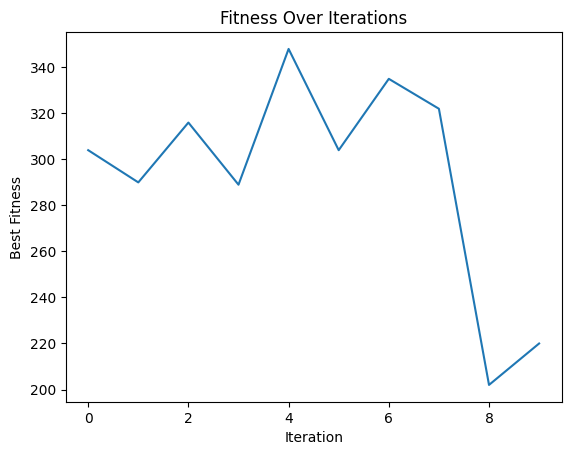

.

Time Complexity Analysis:
Path generation complexity (per iteration): O(5000)
Fitness calculation complexity (per iteration): O(500)
Pheromone update complexity (per iteration): O(500)
Total complexity (all iterations): O(60000)

Space Complexity Analysis:
Pheromone matrix space: O(500)
Paths space: O(500)
Fitness array space: O(10)
Weights space: O(50)
Total space complexity: O(1060)
TEST INPUTS:
Number of ants: 1
Number of items: 1
Number of bins: 1
Evaporation rate: 0.9
Iterations: 1
Weight selected: incrementally increasing weights distribution

First Generation: 
Fitness:    Best:  0   Worst:  0   Average:  0.0
    Best path:  [1]
    Worst path:  [1]

Stopping early: All fitness values reached 0 at iteration 1

Last Generation: 
Fitness:    Best:  0   Worst:  0   Average:  0.0
    Best path:  [1]
    Worst path:  [1]

all itertaion have been used

Last Generation: 
Fitness:    Best:  0   Worst:  0   Average:  0.0
    Best path:  [1]
    Worst path:  [1]

Performance Summary:
Tota

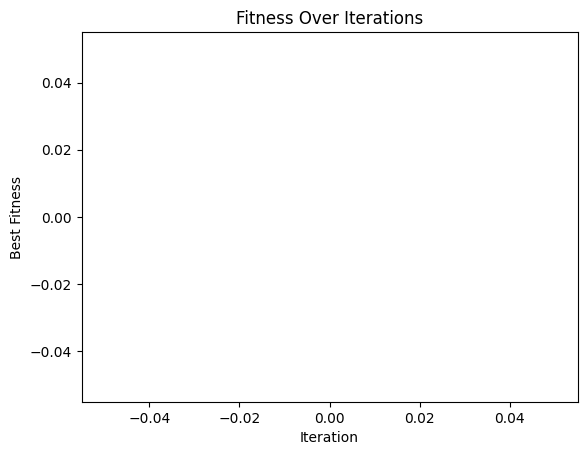

.

Time Complexity Analysis:
Path generation complexity (per iteration): O(1)
Fitness calculation complexity (per iteration): O(1)
Pheromone update complexity (per iteration): O(1)
Total complexity (all iterations): O(3)

Space Complexity Analysis:
Pheromone matrix space: O(1)
Paths space: O(1)
Fitness array space: O(1)
Weights space: O(1)
Total space complexity: O(4)
TEST INPUTS:
Number of ants: 10
Number of items: 100
Number of bins: 10
Evaporation rate: 0.9
Iterations: 50
Weight selected: uniform weight distribution

First Generation: 
Fitness:    Best:  60   Worst:  130   Average:  105.0
    Best path:  [4, 7, 10, 7, 4, 4, 2, 6, 8, 4, 3, 3, 2, 7, 3, 8, 8, 8, 10, 6, 4, 10, 6, 3, 8, 6, 3, 2, 3, 1, 6, 3, 1, 2, 4, 9, 9, 5, 2, 7, 7, 8, 9, 2, 1, 8, 8, 8, 5, 1, 7, 4, 8, 1, 3, 5, 8, 2, 6, 7, 3, 10, 2, 5, 3, 10, 10, 5, 9, 9, 2, 9, 4, 6, 3, 10, 6, 9, 4, 7, 6, 9, 7, 10, 4, 10, 9, 10, 5, 5, 6, 5, 5, 1, 4, 5, 9, 5, 8, 3]
    Worst path:  [4, 6, 3, 6, 3, 8, 9, 10, 4, 6, 3, 5, 4, 4, 1, 9, 4, 10, 5, 

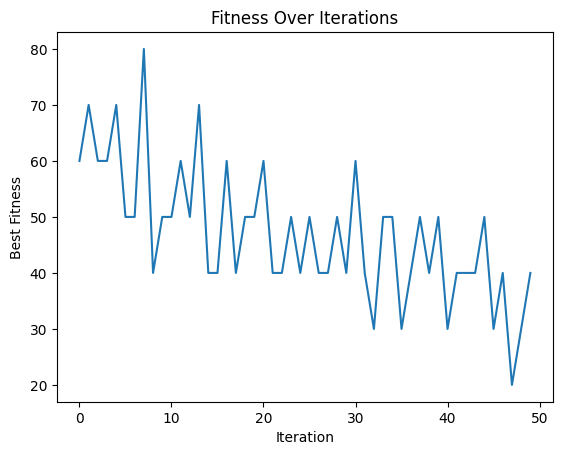

.....
----------------------------------------------------------------------
Ran 9 tests in 2.364s

OK


Time Complexity Analysis:
Path generation complexity (per iteration): O(10000)
Fitness calculation complexity (per iteration): O(1000)
Pheromone update complexity (per iteration): O(1000)
Total complexity (all iterations): O(600000)

Space Complexity Analysis:
Pheromone matrix space: O(1000)
Paths space: O(1000)
Fitness array space: O(10)
Weights space: O(100)
Total space complexity: O(2110)


In [7]:
'''UNIT TEST
'''
import unittest

# Test cases for the ACO implementation
class TestACOAlgorithm(unittest.TestCase):

    def test_validate_inputs_valid(self):
        # Valid inputs
        try:
            validate_inputs(ants_set=10, evaporation_set=0.9, BPP_weight_set=1, num_items=5, bins_set=3, iterations=10)
        except ValueError:
            self.fail("validate_inputs() raised ValueError unexpectedly!")

    def test_validate_inputs_invalid_ants(self):
        # Invalid number of ants
        with self.assertRaises(ValueError):
            validate_inputs(ants_set=0, evaporation_set=0.9, BPP_weight_set=1, num_items=5, bins_set=3, iterations=10)

    def test_single_item_single_bin(self):
        # Single item, single bin
        try:
            AntColonyOptimization(ants_set=1, evaporation_set=0.9, BPP_weight_set=1, num_items=1, bins_set=1, iterations=1)
        except Exception as e:
            self.fail(f"AntColonyOptimization() raised an exception: {e}")

    def test_large_number_of_items(self):
        # Large number of items
        try:
            AntColonyOptimization(ants_set=10, evaporation_set=0.9, BPP_weight_set=3, num_items=1000, bins_set=10, iterations=10)
        except Exception as e:
            self.fail(f"AntColonyOptimization() raised an exception: {e}")
    
    def test_validate_inputs_invalid_ants(self):
        # Invalid number of ants
        with self.assertRaises(ValueError):
            validate_inputs(ants_set=0, evaporation_set=0.9, BPP_weight_set=1, num_items=5, bins_set=3, iterations=10)

    def test_validate_inputs_invalid_evaporation(self):
        # Invalid evaporation rate
        with self.assertRaises(ValueError):
            validate_inputs(ants_set=10, evaporation_set=1.5, BPP_weight_set=1, num_items=5, bins_set=3, iterations=10)

    def test_validate_inputs_invalid_bins(self):
        # Invalid number of bins
        with self.assertRaises(ValueError):
            validate_inputs(ants_set=10, evaporation_set=0.9, BPP_weight_set=1, num_items=5, bins_set=0, iterations=10)

    def test_single_item_single_bin(self):
        # Single item, single bin
        AntColonyOptimization(ants_set=1, evaporation_set=0.9, BPP_weight_set=1, num_items=1, bins_set=1, iterations=1)

    def test_large_number_of_items(self):
        # Large number of items
        AntColonyOptimization(ants_set=10, evaporation_set=0.9, BPP_weight_set=3, num_items=1000, bins_set=10, iterations=10)

    def test_large_weight_disparity(self):
        # Test with exponential weights
        AntColonyOptimization(ants_set=5, evaporation_set=0.8, BPP_weight_set=5, num_items=50, bins_set=5, iterations=20)

    def test_uniform_weights(self):
        # Uniform weight distribution
        AntColonyOptimization(ants_set=10, evaporation_set=0.9, BPP_weight_set=2, num_items=100, bins_set=10, iterations=50)

    def test_random_weights(self):
        # Random weight distribution
        AntColonyOptimization(ants_set=10, evaporation_set=0.9, BPP_weight_set=3, num_items=50, bins_set=10, iterations=10)


# Run tests in Jupyter Notebook
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)